### MRI brain tumor detection dataset
Dataset link: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

### Import packages

In [98]:
import numpy as np

import torch
# DataLoader object is going to help us to iterate through our data very easily.It help us to break out our dataset into mini batches.
from torch.utils.data import Dataset,ConcatDataset, DataLoader 

# glob: glob go to the directory of our dataset and grab all the images.
import glob

# matplotlib: visualizing stuff in python
import matplotlib.pyplot  as plt

# sklearn are used to evaluate the performance of our model. Confusion Matrix is a way to numerically represent four different combinations of right or wrong for our dataset.
# accuracy score: to evaluate the performance of their classifier.
# <!-- ![img alt text](confusion_matrix.png) -->
from sklearn.metrics import confusion_matrix, accuracy_score

# cv2 is a computer vision package. It helps to read image data and video data.
import cv2

import random

### Reading the Images - Preprocessing

In [2]:
tumor = []
path = "./brain_tumor_dataset/yes/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    tumor.append(img)

In [3]:
len(tumor)

154

In [4]:
for img in tumor:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [5]:
healthy = []
path = "./brain_tumor_dataset/no/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    healthy.append(img)

In [6]:
len(healthy)

91

In [7]:
for img in healthy:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [8]:
# Convert the lists to numpy arrays.
healthy = np.array(healthy)
tumor = np.array(tumor)

In [9]:
tumor.shape
# (154, 128, 128, 3)
# We have 154 images. 
# Each of image has 3 channels
# Each channel has width and height of 128

(154, 128, 128, 3)

In [10]:
healthy.shape

(91, 128, 128, 3)

In [11]:
# We need to pass the arrays in the form of the tuple
All = np.concatenate((healthy,tumor))


In [12]:
All.shape

(245, 128, 128, 3)

### Visualizing Brain MRI images

In [13]:
# 5 is not included. It randomly choses integer value between 0 & 5.
# 3 means, i want to select 3 random numbers b/w values 0 - 5
print(np.random.choice(5,3))

# if we don't want the choice to be repeated
print(np.random.choice(5,3, replace=False))


[0 2 1]
[1 4 0]


In [14]:
healthy[0].shape

(128, 128, 3)

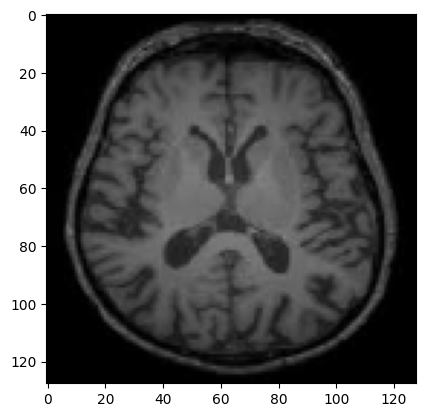

In [15]:
plt.imshow(healthy[0])

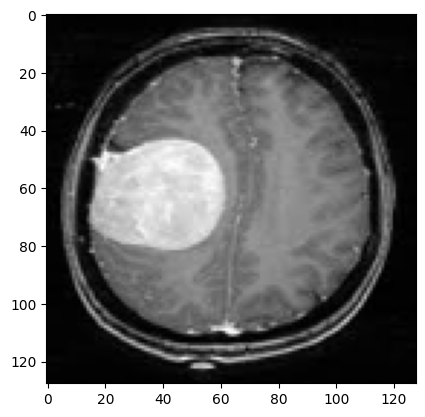

In [16]:
plt.imshow(tumor[0])

In [17]:
def plot_random(healthy, tumor, num=5):
    healthy_images = healthy[np.random.choice(healthy.shape[0],num, replace=False)]
    tumor_images = tumor[np.random.choice(tumor.shape[0],num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        # In matplotlib sublots are not indexed from zero. They are indexed from one. 
        # sublot(Row, Columns in Row, subplot no.)
        plt.subplot(1,num, i + 1)
        plt.title("healthy")
        plt.imshow(healthy_images[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i + 1)
        plt.title("tumor")
        plt.imshow(tumor_images[i])


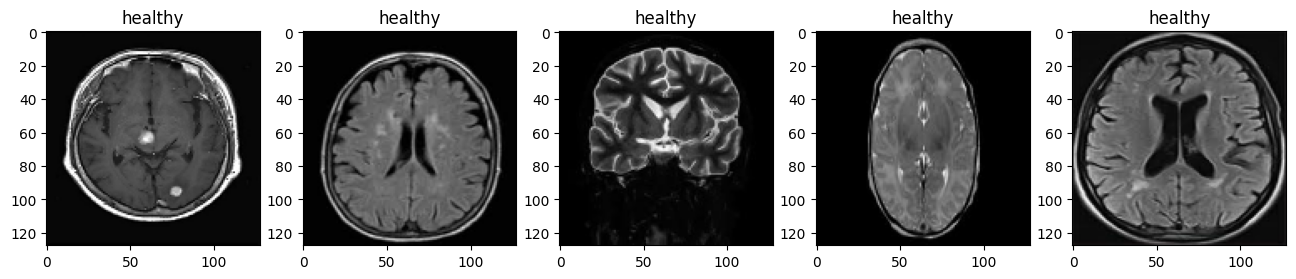

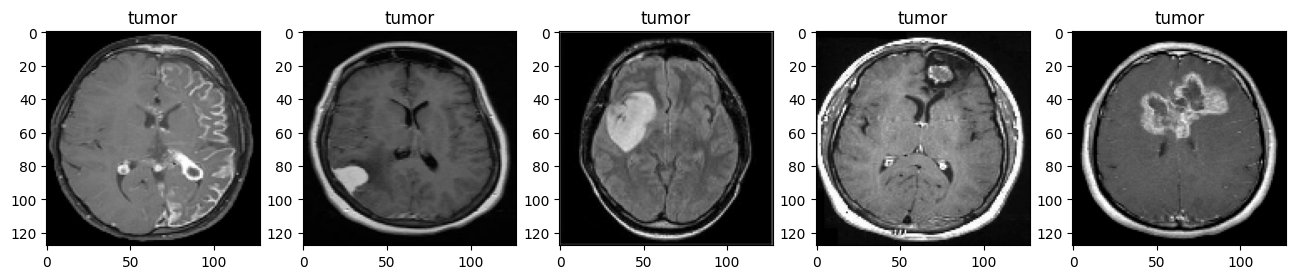

In [18]:
plot_random(healthy,tumor)

### Create Torch Dataset Class
##### What is Pytorch's Abstract Dataset Class

In [19]:
# pytorch has a Dataset class already
class Dataset(object):
    # There is no defined constructor.

    # getitem magical function is used to retrieve a certain datapoint living at a certain index of dataset
    def __getitem__(self, index):
        raise NotImplementedError
    
    # len magical function is used to retrieve a length of a dataset
    def __len__(self):
        raise NotImplementedError
    
    # a = 'st'
    # b = 'zz'
    # a + b = stzz
    # add magical fuction,concatenate the strings and return the result of the concatenation
    def __add__(self, other):
        return ConcatDataset([self, other])

In [20]:
class MRI(Dataset):
    def __init__(self, scores):
        self.x = scores
    
    def __getitem__(self, index):
        return self.x[index]

    def __len__(self):
        return len(self.x)

In [21]:
s = [1,2,3,4,5]
d = MRI(s)

In [22]:
d.x

[1, 2, 3, 4, 5]

In [23]:
d[2]

3

In [24]:
len(d)

5

In [25]:
s1 = [1, 2, 3, 4, 5]
d1 = MRI(s1)

s2 = [6, 7, 8, 9, 10]
d2 = MRI(s2)

d3 = d1 + d2
len(d3)

10

### Creating MRI custom dataset class

In [79]:
class MRIDataset(Dataset):
    def __init__(self):
        healthy = []
        path = "./brain_tumor_dataset/no/*jpg"
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            # print(img.shape)
            healthy.append(img)
        
        tumor = []
        path = "./brain_tumor_dataset/yes/*jpg"
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            # print(img.shape)
            tumor.append(img)
        
        healthy = np.array(healthy, dtype=np.float32)
        # print("Healthy", healthy.shape)
        tumor = np.array(tumor, dtype=np.float32)
        # print("Tumor", tumor.shape)
    
        # LABELS - Tumor with 1's & Halthy with 0's
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        # print(tumor_label)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)
        # print(healthy_label)

        # CONCATENATE
        # Concatenate across first access, it means that 100 of images attach that to 200 of these images
        self.images = np.concatenate((tumor, healthy), axis=0) # (100,512,512,3) + (200,512,512,3) = (300, 512, 512, 3)
        self.labels = np.concatenate((tumor_label, healthy_label)) # We don't need axis = 0 becasue 1s and 0s have 1 dimention. They don't have multiple channels.


    
    def __getitem__(self, index):
        return {'image': self.images[index], 'label': self.labels[index]}

    def __len__(self):
        return self.images.shape[0]

    def normalize(self):
        self.images = self.images/255.0

In [80]:
mri_dataset = MRIDataset()
img = mri_dataset[5]['image']
img.shape

(3, 128, 128)

In [81]:
np.max(img)

255.0

In [82]:
mri_dataset.normalize()

In [86]:
img = mri_dataset[244]['image']
np.max(img)

0.9647059

### Creating a dataloader
#### The world without dataloaders - using for loop

SystemExit: 

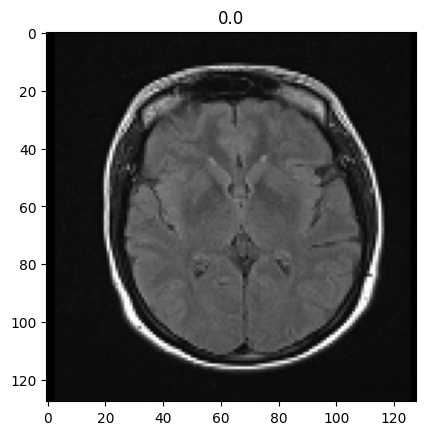

In [114]:
import sys
mri2 = MRIDataset()
mri2.normalize()
indexes = list(range((len(mri2.images))))
random.shuffle(indexes) # shuffle is an in-place operation

for idx in indexes:
    img = mri2[idx]['image']
    img = img.reshape([img.shape[2], img.shape[1], img.shape[0]])
    plt.title(mri2[idx]['label'])
    plt.imshow(img)
    sys.exit()
    # plt.show()

#### The world without dataloaders - using for Next(Iter) commands

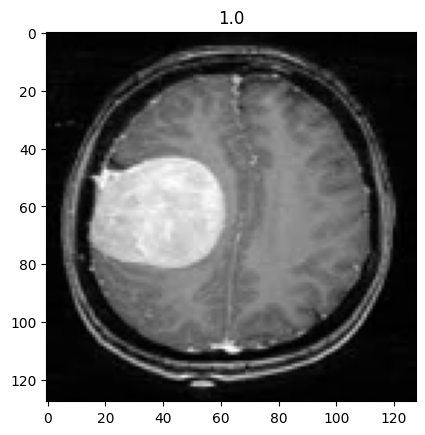

In [123]:
it = iter(mri2)
for idx in range(1):
    img = next(it)['image']
    img = img.reshape([img.shape[2], img.shape[1], img.shape[0]])
    plt.title(mri2[idx]['label'])
    plt.imshow(img)
    plt.show()
    # sys.exit()